In [2]:
# Required Imports
import numpy as np
import os
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split

# ML Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from PipelineFunctions import *

In [18]:
# Load the data and split into features and targets, X and y

df_bike = pd.read_csv('./data/hour.csv', sep=',')
# Convert date time to integer
df_bike['dteday'] = pd.to_datetime(df_bike['dteday']).apply(lambda x : x.toordinal())

data = df_bike.to_numpy()
X = data[:1000,1:-1]
y = data[:1000,-1]

In [5]:
# Split the data
X_trn, X_tst, y_trn, y_tst = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
# Scale the data
scaler = sklearn.preprocessing.StandardScaler()
X_trn = scaler.fit_transform(X_trn)
X_tst = scaler.fit_transform(X_tst)

## Linear Regression

Dummy model: LinearRegression()
With 100.0% train accuracy
With 99.796% test accuracy
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best estimator: LinearRegression(n_jobs=0.0001)
With 100.0% train accuracy
With 99.796% test accuracy


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.0s finished


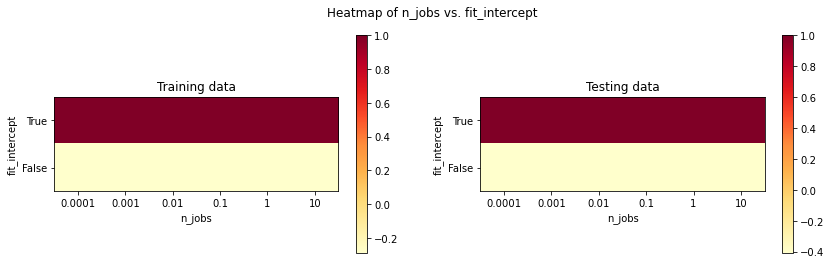

In [7]:
# Test a few different hyperparameters for Linear Regression: n_jobs, fit_intercept
n_jobs_vals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
intercept_vals = [True, False]
param_grid_lr ={'n_jobs': n_jobs_vals, 'fit_intercept':intercept_vals}

# Train a dummy Linear Regression model with default values
dummy_lr = train_dummy_model(X_trn, y_trn, X_tst, y_tst, sklearn.linear_model.LinearRegression)

# Train different Linear regression models, using grid search and cross validation to find best hyperparameters.
gs_lr = grid_search(X_trn, y_trn, X_tst, y_tst, sklearn.linear_model.LinearRegression,param_grid_lr)

# Plot heatmap of the gridsearch
plot_gridsearch_2(gs_lr, n_jobs_vals, intercept_vals, 'n_jobs', 'fit_intercept')

## Support Vector Regression

Dummy model: SVR()
With 52.406% train accuracy
With 51.174% test accuracy
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    3.3s finished


Best estimator: SVR(C=1000.0, gamma=0.001)
With 99.999% train accuracy
With 99.803% test accuracy


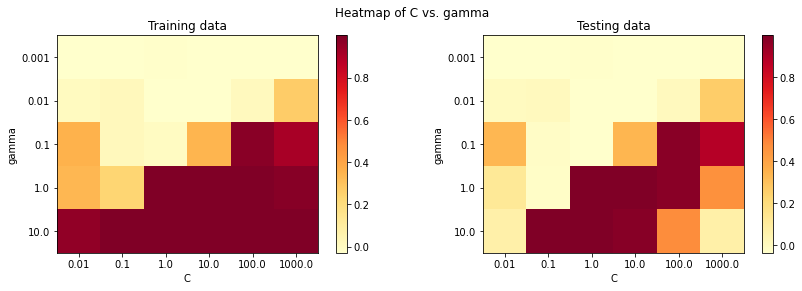

In [8]:
# Test a few different hyperparameters for SVM: C, gamma
c_vals_svm = [0.01,0.1,1.0,10.0,100.0,1000.0]
g_vals_svm = [0.001,0.01,0.1,1.0,10.0]
param_grid_svm = {'C': c_vals_svm, 'gamma' : g_vals_svm}

# Train a dummy SVM model with default values
dummy_svm = train_dummy_model(X_trn, y_trn, X_tst, y_tst, sklearn.svm.SVR)

# Train different svm models, using grid search and cross validation to find best hyperparameters.
gs_svm = grid_search(X_trn, y_trn, X_tst, y_tst, sklearn.svm.SVR,param_grid_svm)

# Plot heatmap of the gridsearch
plot_gridsearch_2(gs_svm, c_vals_svm, g_vals_svm, 'C', 'gamma')

## Decision Tree Regression

Dummy model: DecisionTreeRegressor()
With 100.0% train accuracy
With 99.227% test accuracy
Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best estimator: DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, random_state=0)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.1s finished



With 99.721% train accuracy
With 99.131% test accuracy


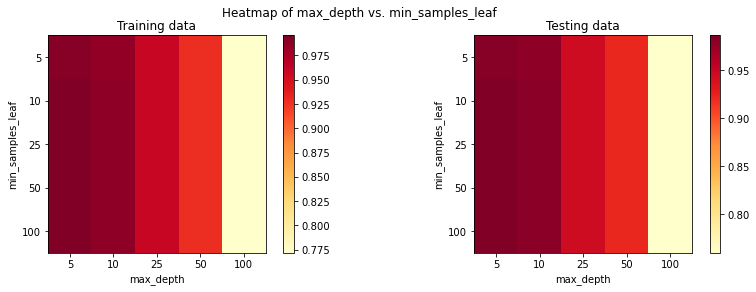

In [9]:
# Test a few different hyperparameters for Decision Tree: max_depth, min_samples_leaf
dep_vals_dt = [5, 10, 25, 50, 100]
samp_leaf_dt = [5, 10, 25, 50, 100]
param_grid_dt = {'max_depth' : dep_vals_dt, 'min_samples_leaf' : samp_leaf_dt}

# Train a dummy Decision Tree model with default values
dummy_dt = train_dummy_model(X_trn, y_trn, X_tst, y_tst, sklearn.tree.DecisionTreeRegressor)

# Train different decision tree  models, using grid search and cross validation to find best hyperparameters.
gs_dt = grid_search(X_trn, y_trn, X_tst, y_tst, sklearn.tree.DecisionTreeRegressor,param_grid_dt,random_state=0)


# Plot heatmap of the gridsearch
plot_gridsearch_2(gs_dt, dep_vals_dt, samp_leaf_dt, 'max_depth', 'min_samples_leaf')


## Random Forest Regression

Dummy model: RandomForestRegressor()
With 99.954% train accuracy
With 99.51% test accuracy
Fitting 3 folds for each of 56 candidates, totalling 168 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:  1.8min finished


Best estimator: RandomForestRegressor(max_depth=25, n_estimators=500, random_state=0)
With 99.951% train accuracy
With 99.514% test accuracy


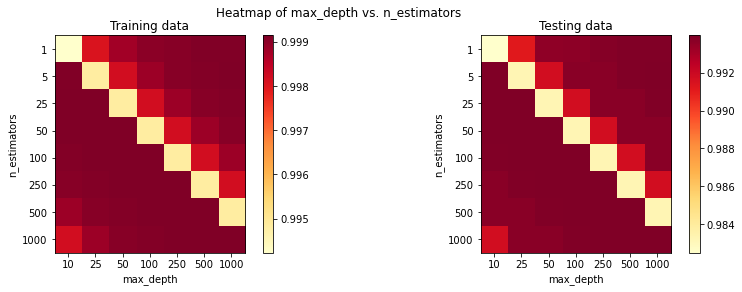

In [10]:
# Test a few different hyperparameters for Random Forest: max_depth, n_estimators
dep_vals_rf = [10,25,50, 100,250,500,1000]
est_vals_rf = [1,5,25,50,100,250,500,1000]
param_grid_rf = {'max_depth': dep_vals_rf, 'n_estimators' : est_vals_rf}

# Train a dummy Random Forest model with default values
dummy_rf = train_dummy_model(X_trn, y_trn, X_tst, y_tst, sklearn.ensemble.RandomForestRegressor)

# Train different random forest models, using grid search and cross validation to find best hyperparameters.
gs_rf = grid_search(X_trn, y_trn, X_tst, y_tst, sklearn.ensemble.RandomForestRegressor,param_grid_rf,random_state=0)

# Plot heatmap of the gridsearch
plot_gridsearch_2(gs_rf, dep_vals_rf, est_vals_rf, 'max_depth', 'n_estimators')

## K-nearest Neighbours Regression

Dummy model: KNeighborsRegressor()
With 91.755% train accuracy
With 88.61% test accuracy
Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    1.6s finished


Best estimator: KNeighborsRegressor(metric='euclidean')
With 91.755% train accuracy
With 88.61% test accuracy


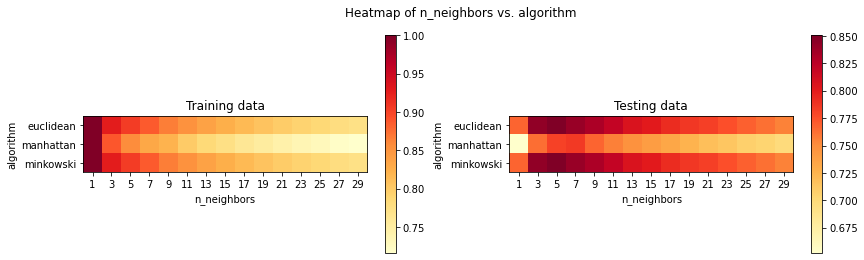

In [11]:
# Test a few different hyperparameters for K-nearest neighbours: n_neighbors, algorithm
n_vals_k = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
m_vals_k = ['euclidean', 'manhattan', 'minkowski']
param_grid_knn = {'n_neighbors': n_vals_k, 'metric' : m_vals_k}

# Train a dummy KNN model with default values
dummy_knn = train_dummy_model(X_trn, y_trn, X_tst, y_tst, sklearn.neighbors.KNeighborsRegressor)

# Train different KNN models, using grid search and cross validation to find best hyperparameters.
gs_knn = grid_search(X_trn, y_trn, X_tst, y_tst, sklearn.neighbors.KNeighborsRegressor,param_grid_knn)

# Plot heatmap of the gridsearch
plot_gridsearch_2(gs_knn, n_vals_k, m_vals_k, 'n_neighbors', 'algorithm')

## AdaBoost Regression

Dummy model: AdaBoostRegressor()
With 98.447% train accuracy
With 97.696% test accuracy
Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   10.6s finished


Best estimator: AdaBoostRegressor(learning_rate=2.0, random_state=0)
With 98.752% train accuracy
With 98.143% test accuracy


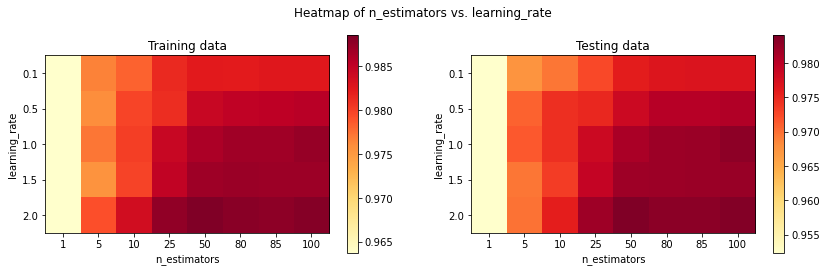

In [12]:
# Test a few different hyperparameters for AdaBoost: n_estimators, learning_rate
est_vals_ada = [1,5,10,25,50,80,85,100]
learn_vals_ada = [0.1, 0.5, 1.0, 1.5, 2.0]
param_grid_ada = {'n_estimators': est_vals_ada, 'learning_rate' : learn_vals_ada}

# Train a dummy AdaBoost model with default values
dummy_ada = train_dummy_model(X_trn, y_trn, X_tst, y_tst, sklearn.ensemble.AdaBoostRegressor)

# Train different AdaBoost models, using grid search and cross validation to find best hyperparameters.
gs_ada = grid_search(X_trn, y_trn, X_tst, y_tst, sklearn.ensemble.AdaBoostRegressor,param_grid_ada, random_state=0)

# Plot heatmap of the gridsearch
plot_gridsearch_2(gs_ada, est_vals_ada, learn_vals_ada, 'n_estimators', 'learning_rate')

## Gaussian process regression

Dummy model: GaussianProcessRegressor()
With 100.0% train accuracy
With 59.843% test accuracy
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s finished


Best estimator: GaussianProcessRegressor(alpha=0.05)
With 99.831% train accuracy
With 57.831% test accuracy


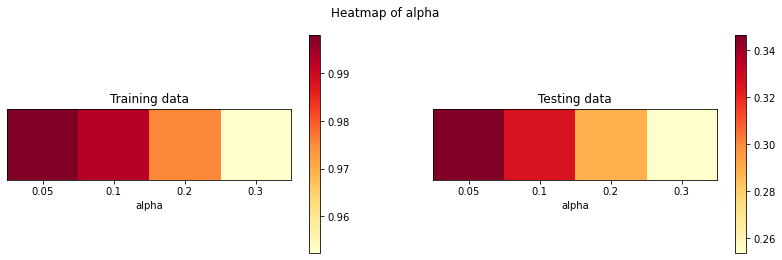

In [13]:
# Test a few different hyperparameters for Gaussian process regression: alpha
alpha_gpr = [0.05, 0.1, 0.2, 0.3]
param_grid_gnb = {'alpha' : alpha_gpr}

# Train a dummy Gaussian process regression model with default values
dummy_gpr = train_dummy_model(X_trn, y_trn, X_tst, y_tst, sklearn.gaussian_process.GaussianProcessRegressor)

# Train different Gaussian process regression models, using grid search and cross validation to find best hyperparameters.
gs_gpr = grid_search(X_trn, y_trn, X_tst, y_tst, sklearn.gaussian_process.GaussianProcessRegressor,param_grid_gnb)

# Plot heatmap of the gridsearch
plot_gridsearch_1(gs_gpr, alpha_gpr, 'alpha')

## Neural network regression

C:\Users\Moka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Dummy model: MLPRegressor()
With 92.819% train accuracy
With 92.744% test accuracy
Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\Moka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Moka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Moka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Moka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Moka\anaconda3\lib\site-packages\sklearn\neural_network\_multil

Best estimator: MLPRegressor(batch_size=100, hidden_layer_sizes=(10, 10),
             learning_rate_init=0.01, max_iter=1000, random_state=0)
With 99.998% train accuracy
With 99.721% test accuracy


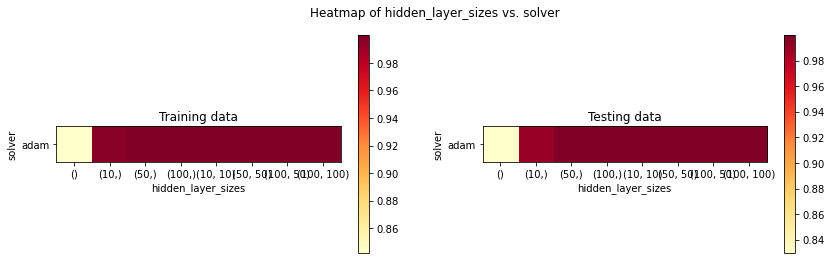

In [17]:
# Test a few different hyperparameters for Neural Network Regression: hidden_layer_sizes, solver
hl_vals = [(),(10,),(50,),(100,),(10,10),(50,50),(100,50),(100,100)]
solv_vals = ['adam']
param_grid_nnr = {'hidden_layer_sizes' : hl_vals, 'solver' : solv_vals}

# Train a dummy Neural Net model with default values
dummy_nn = train_dummy_model(X_trn, y_trn, X_tst, y_tst, sklearn.neural_network.MLPRegressor)

# Train different Neural Net models, using grid search and cross validation to find best hyperparameters.
gs_nn = grid_search(X_trn, y_trn, X_tst, y_tst, sklearn.neural_network.MLPRegressor,param_grid_nnr,activation='relu',max_iter=1000,batch_size=100,learning_rate_init=0.01,random_state=0)

# Plot heatmap of the gridsearch
plot_gridsearch_2(gs_nn, hl_vals, solv_vals, 'hidden_layer_sizes', 'solver')